In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plot

In [3]:
train_data = pd.read_csv('train.csv')
train_data = train_data.drop('label', axis=1)
train_data = train_data.as_matrix() / 255

In [5]:
IMAGE_SIZE = 28
BATCH_SIZE = 512
NUM_ITERATIONS = 30000
HIDDEN_LAYERS_GEN = 128
LEARNING_RATE = 0.0001

In [6]:
# Loading Batches
epochs_completed = 0
index_in_epoch = 0
num_examples = train_data.shape[0]


def next_batch(batch_size):
    global train_data
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_data = train_data[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return train_data[start:end]

In [7]:
def get_sample_z(size=[1, 100]):
    return np.random.normal(size=size)


def display_image(image_data):
    img = image_data.reshape([IMAGE_SIZE, IMAGE_SIZE])
    plot.axis('off')
    plot.imshow(img, cmap=matplotlib.cm.binary)
    plot.show()

In [8]:
# Model

Z_in = tf.placeholder(tf.float32, shape=[None, 100])
image_in = tf.placeholder(tf.float32, shape=[None,
                                             IMAGE_SIZE * IMAGE_SIZE])


def generator(z):
    with tf.variable_scope('generator'):
        h = tf.layers.dense(z, HIDDEN_LAYERS_GEN)
        h = tf.minimum(h, 0.01)
        logits = tf.layers.dense(h, IMAGE_SIZE * IMAGE_SIZE)
        output = (tf.nn.tanh(logits) + tf.ones_like(logits)) / 2
        return output


def discriminator(image, reuse=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        h = tf.layers.dense(image, HIDDEN_LAYERS_GEN)
        h = tf.minimum(h, 0.01)
        logits = tf.layers.dense(h, 1)
        output = tf.nn.sigmoid(logits)
        return output

In [9]:
gen_sample = generator(Z_in)

discriminator_data = discriminator(image_in)
discriminator_model = discriminator(gen_sample, reuse=True)

In [10]:
# losses
discriminator_loss = -tf.reduce_mean(tf.log(discriminator_data) +
                                     tf.log(tf.ones_like(discriminator_model) -
                                            discriminator_model))

generator_loss = -tf.reduce_mean(tf.log(discriminator_model))

In [11]:
all_vars = tf.trainable_variables()
generator_vars = [var for var in all_vars if var.name.startswith('generator')]
discriminator_vars = [var for var in all_vars if var.name.startswith('discriminator')]

discriminator_optimize = tf.train.AdamOptimizer(LEARNING_RATE).minimize(discriminator_loss,
                                                                        var_list=discriminator_vars)
generator_optimize = tf.train.AdamOptimizer(LEARNING_RATE).minimize(generator_loss,
                                                                    var_list=generator_vars)

In [12]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()

sess.run(init)


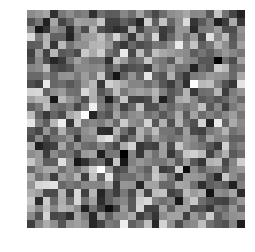

Step 0 => Discriminator: 1.2202444076538086 | Generator: 1.0629891157150269


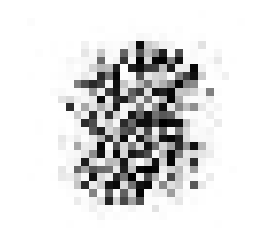

Step 1000 => Discriminator: 0.2913484275341034 | Generator: 2.208923816680908


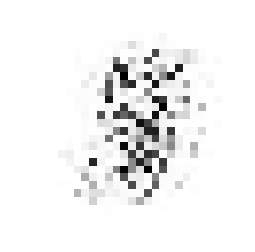

Step 2000 => Discriminator: 0.5165836215019226 | Generator: 1.3888070583343506


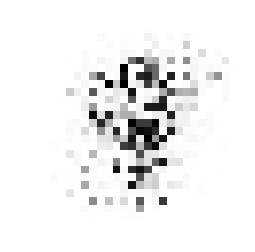

Step 3000 => Discriminator: 0.38443124294281006 | Generator: 1.8828920125961304


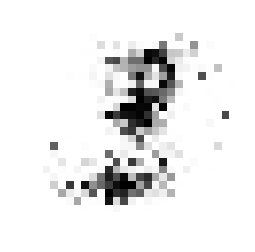

Step 4000 => Discriminator: 0.4334069490432739 | Generator: 1.8725643157958984


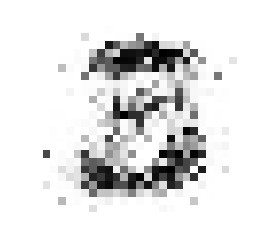

Step 5000 => Discriminator: 0.8033948540687561 | Generator: 1.7327570915222168


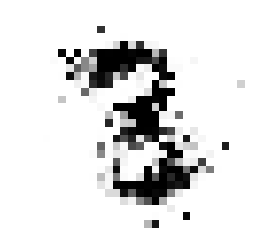

Step 6000 => Discriminator: 0.43903395533561707 | Generator: 2.04264497756958


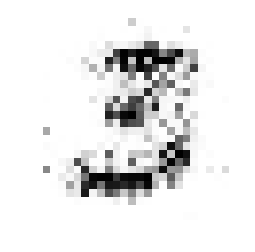

Step 7000 => Discriminator: 0.43446800112724304 | Generator: 2.1709656715393066


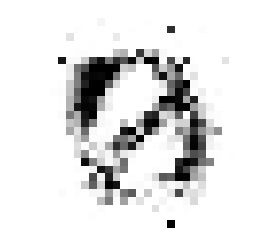

Step 8000 => Discriminator: 0.4939066469669342 | Generator: 2.022836446762085


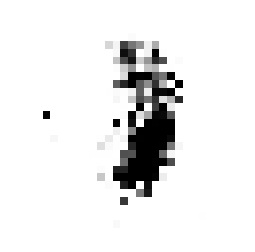

Step 9000 => Discriminator: 0.6542901992797852 | Generator: 1.7495689392089844


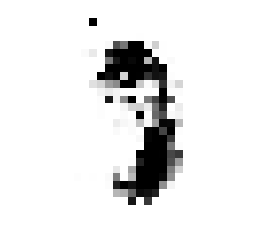

Step 10000 => Discriminator: 0.6840914487838745 | Generator: 1.7529840469360352


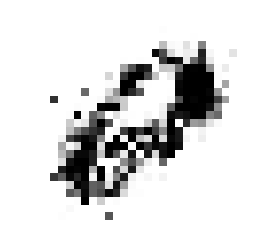

Step 11000 => Discriminator: 0.495546817779541 | Generator: 1.974564552307129


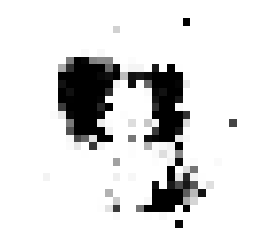

Step 12000 => Discriminator: 0.4122009575366974 | Generator: 2.193124294281006


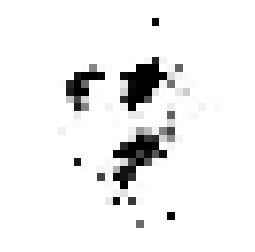

Step 13000 => Discriminator: 0.5624125003814697 | Generator: 2.0233936309814453


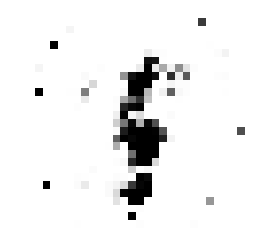

Step 14000 => Discriminator: 0.4055993854999542 | Generator: 2.1968941688537598


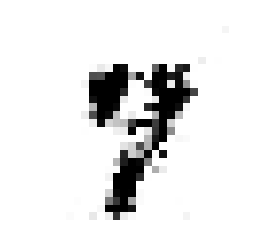

Step 15000 => Discriminator: 0.4553861618041992 | Generator: 2.2874722480773926


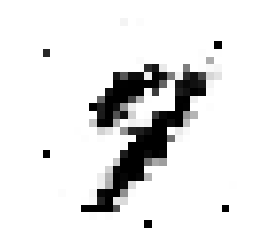

Step 16000 => Discriminator: 0.41570109128952026 | Generator: 2.3971405029296875


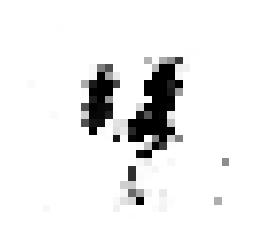

Step 17000 => Discriminator: 0.4518532156944275 | Generator: 2.2231194972991943


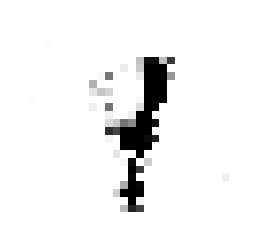

Step 18000 => Discriminator: 0.5528664588928223 | Generator: 2.1689751148223877


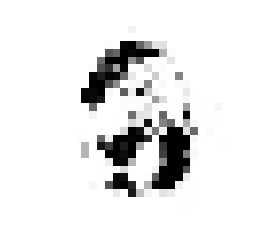

Step 19000 => Discriminator: 0.5150100588798523 | Generator: 2.216019868850708


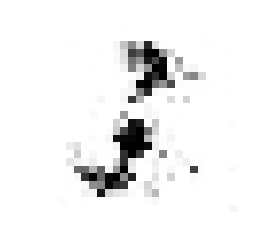

Step 20000 => Discriminator: 0.5306298136711121 | Generator: 2.255821704864502


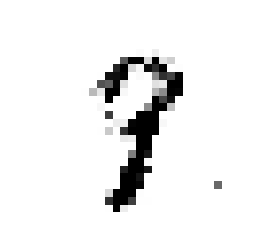

Step 21000 => Discriminator: 0.4965088963508606 | Generator: 2.4780759811401367


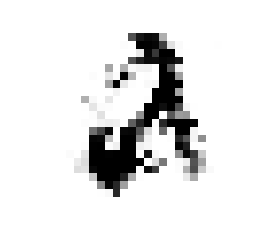

Step 22000 => Discriminator: 0.49831920862197876 | Generator: 2.3391194343566895


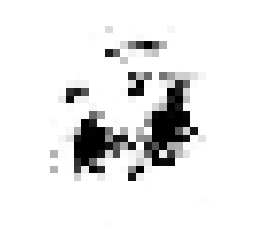

Step 23000 => Discriminator: 0.6021208763122559 | Generator: 2.067807197570801


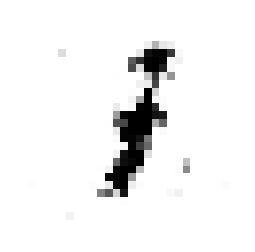

Step 24000 => Discriminator: 0.5990030765533447 | Generator: 2.1342334747314453


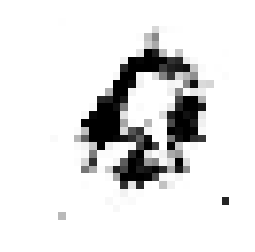

Step 25000 => Discriminator: 0.49935922026634216 | Generator: 2.3621058464050293


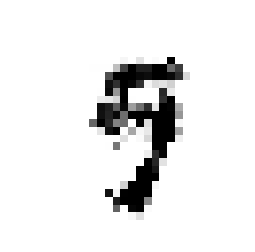

Step 26000 => Discriminator: 0.5391244292259216 | Generator: 2.3033981323242188


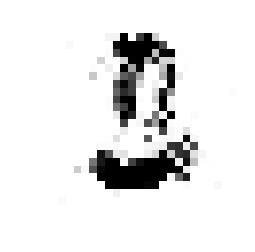

Step 27000 => Discriminator: 0.5911771059036255 | Generator: 2.345083236694336


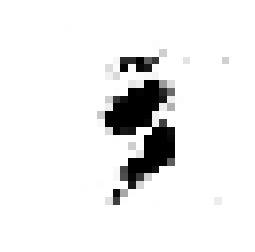

Step 28000 => Discriminator: 0.6431540250778198 | Generator: 2.2629811763763428


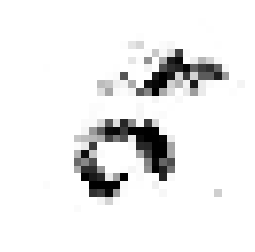

Step 29000 => Discriminator: 0.6223540306091309 | Generator: 2.3838624954223633


In [13]:
for i in range(NUM_ITERATIONS):
    image_batch = next_batch(BATCH_SIZE)
    _ = sess.run(discriminator_optimize, feed_dict={Z_in: get_sample_z([BATCH_SIZE, 100]), image_in: image_batch})
    _ = sess.run(generator_optimize, feed_dict={Z_in: get_sample_z([BATCH_SIZE, 100])})
    
    disc_losses = sess.run(discriminator_loss, feed_dict={Z_in: get_sample_z([BATCH_SIZE, 100]),
                                                          image_in: image_batch})
    gen_losses = sess.run(generator_loss, feed_dict={Z_in: get_sample_z([BATCH_SIZE, 100])})
    
    if i % 1000 == 0:
        sample = sess.run(gen_sample, feed_dict={Z_in: get_sample_z()})
        display_image(sample)
        print('Step {} => Discriminator: {} | Generator: {}'.format(i, disc_losses, gen_losses))